In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as cx
import os
import seaborn as sns

# Analyse de la stratégie d'implantation des entrepôts

In [52]:
for csv_file in os.listdir("./data_clean"):
    if csv_file[-3:] == "csv":
        globals()[csv_file[:-4]] = pd.read_csv("./data_clean/" + csv_file)

## Répartition des entrepôts en France

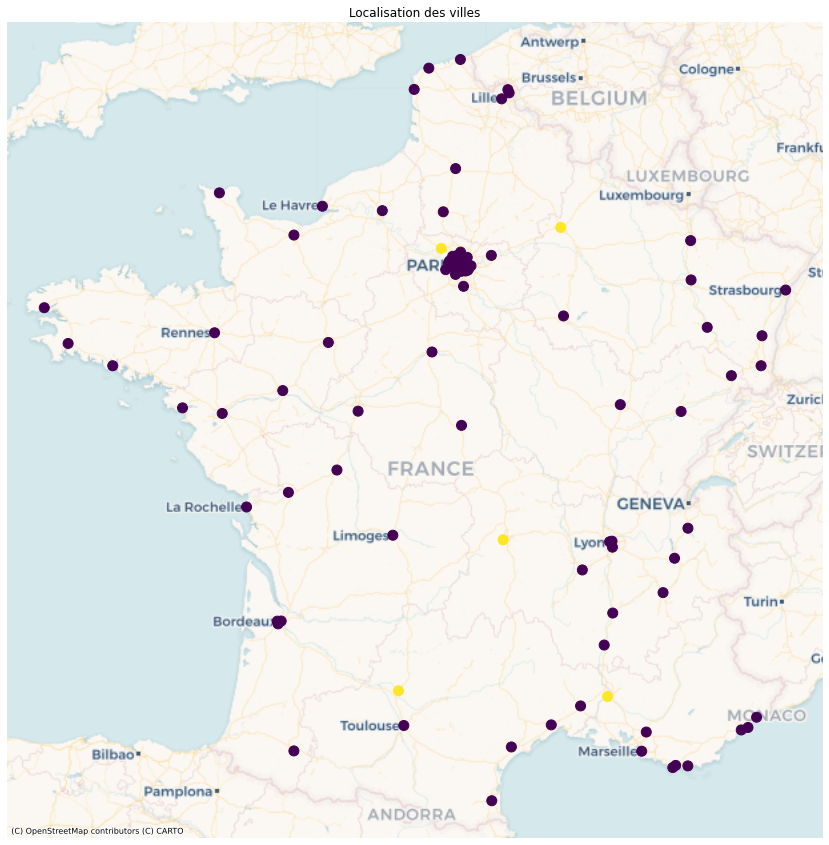

In [53]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities.lng, cities.lat), crs=4326)
gdf.to_crs(epsg=3857).plot(ax=ax, column="is_warehouse", markersize=100)
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, zoom=6)
ax.axis('off')
ax.set_title("Localisation des villes")
plt.show()

## Rattâchement des villes aux entrepôts

In [54]:
orders.head()

,Unnamed: 0,order_id,package_id,package_volume,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume
0,0,EtPmaD3APj8aRNeSC3Yx7R,Z8722BWG8WfyrU3jeWsWGo,0.2732,Nice,Avignon,2021-01-01,2021-01-04 00:00:00,27.0,7.3764
1,1,4X4RBUwTXGBMVWdEj8Gti4,4oxrPXkner2kvXqvLQiCXF,0.2384,Issy-les-Moulineaux,Cergy,2021-01-01,2021-01-03 00:00:00,41.0,9.7744
2,2,GDhuTcBnr9xdRhFb2jLYcW,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Toulouse,Montauban,2021-01-01,2021-01-08 00:00:00,35.0,49.5320
3,3,3EZDvpzw5DdxXyJ66Py75J,3nwbxBUemtMG75cVPs7q7R,1.3451,Poitiers,Montauban,2021-01-01,2021-01-09 00:00:00,21.0,28.2471
4,4,Fpvw9NfnexSxjzLvyPWKbQ,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Épinal,Reims,2021-01-01,2021-01-09 00:00:00,22.0,31.1344


In [55]:
delivery_warehouse = orders[["delivery_location", "from_warehouse"]].groupby("from_warehouse").agg(set).explode("delivery_location").reset_index()

In [56]:
len(set(delivery_warehouse.delivery_location))

100

In [58]:
cities = pd.merge(cities, delivery_warehouse, left_on="city", right_on="delivery_location").drop("delivery_location", axis=1)

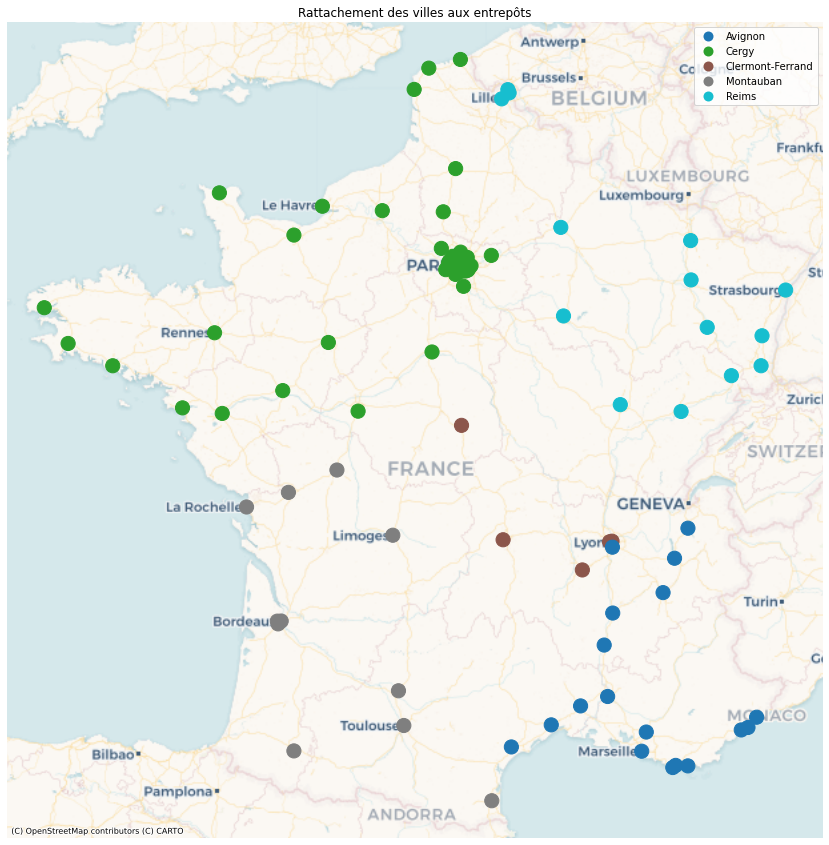

In [59]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities.lng, cities.lat), crs=4326)
gdf.to_crs(epsg=3857).plot(ax=ax, column="from_warehouse", legend=True, markersize=200)
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, zoom=6)
ax.axis('off')
ax.set_title("Rattachement des villes aux entrepôts")
plt.show()

## Pression exercée sur les entrepôts

In [ ]:
orders

,Unnamed: 0,order_id,package_id,package_volume,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume,n_orders
0,0,EtPmaD3APj8aRNeSC3Yx7R,Z8722BWG8WfyrU3jeWsWGo,0.2732,Nice,Avignon,2021-01-01,2021-01-04 00:00:00,27.0,7.3764,1
1,1,4X4RBUwTXGBMVWdEj8Gti4,4oxrPXkner2kvXqvLQiCXF,0.2384,Issy-les-Moulineaux,Cergy,2021-01-01,2021-01-03 00:00:00,41.0,9.7744,1
2,2,GDhuTcBnr9xdRhFb2jLYcW,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Toulouse,Montauban,2021-01-01,2021-01-08 00:00:00,35.0,49.5320,1
3,3,3EZDvpzw5DdxXyJ66Py75J,3nwbxBUemtMG75cVPs7q7R,1.3451,Poitiers,Montauban,2021-01-01,2021-01-09 00:00:00,21.0,28.2471,1
4,4,Fpvw9NfnexSxjzLvyPWKbQ,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Épinal,Reims,2021-01-01,2021-01-09 00:00:00,22.0,31.1344,1
...,...,...,...,...,...,...,...,...,...,...,...
36126,37001,jb82btLz8DFGCj5DRxeCYm,htoLtHv3Fuxv4ncvCaGhqv,0.0020,Saint-Maur-des-Fossés,Cergy,2021-06-28,2021-06-29 00:00:00,11.0,0.0220,1
36127,37002,EP4cxv9xxgHo7eRfU9hGCE,CMSWwyZ9SfPoAqr6BsZws4,0.2590,Limoges,Montauban,2021-06-28,2021-06-29 00:00:00,17.0,4.4030,1
36128,37003,XLds5k5ZntyPmz5LvBjage,Zvus8XQuxNr4GjWYptXEs5,0.0020,Saint-Nazaire,Cergy,2021-06-28,2021-06-29 00:00:00,44.0,0.0880,1
36129,37004,RCxP43qv9xYGbARgFHHV5r,aZY3fiBNXajyPoPcgxBmM4,0.0020,Clichy,Cergy,2021-06-28,2021-06-29 00:00:00,37.0,0.0740,1


In [62]:
orders["n_orders"] = 1
pressure_orders = orders[["from_warehouse", "order_total_volume", "n_units", "n_orders", "order_date"]].groupby(["order_date", "from_warehouse"]).agg("sum").reset_index().groupby("from_warehouse").agg("mean").reset_index()
print("Moyennes journalières")
pressure_orders

Moyennes journalières


,from_warehouse,order_total_volume,n_units,n_orders
0,Avignon,453.923485,956.525140,36.391061
1,Cergy,1310.151226,2710.636872,104.312849
2,Clermont-Ferrand,129.465144,270.301676,10.173184
3,Montauban,283.529722,584.631285,22.351955
4,Reims,359.411699,743.033520,28.620112


In [65]:
routes["n_routes"] = 1
pressure_routes = routes[["from_warehouse", "duration", "total_distance", "n_routes", "n_units", "fill_volume","route_date"]].groupby(["route_date", "from_warehouse"]).agg("sum").reset_index().groupby("from_warehouse").agg("mean").reset_index()
print("Moyennes journalières")
pressure_routes

Moyennes journalières


,from_warehouse,duration,total_distance,n_routes,n_units,fill_volume
0,Avignon,56.609451,3112.089179,7.556180,961.898876,456.473617
1,Cergy,154.116997,7817.291625,20.927374,2710.636872,1310.151226
2,Clermont-Ferrand,12.896843,520.409925,2.374302,270.301676,129.465144
3,Montauban,39.101050,2480.453004,4.797753,587.915730,285.122585
4,Reims,50.065008,3218.159589,5.899441,743.033520,359.411699


In [67]:
pressure = pd.merge(pressure_orders, pressure_routes.drop(["n_units", "fill_volume"], axis=1), on="from_warehouse")
print("Moyennes journalières")
pressure

Moyennes journalières


,from_warehouse,order_total_volume,n_units,n_orders,duration,total_distance,n_routes
0,Avignon,453.923485,956.525140,36.391061,56.609451,3112.089179,7.556180
1,Cergy,1310.151226,2710.636872,104.312849,154.116997,7817.291625,20.927374
2,Clermont-Ferrand,129.465144,270.301676,10.173184,12.896843,520.409925,2.374302
3,Montauban,283.529722,584.631285,22.351955,39.101050,2480.453004,4.797753
4,Reims,359.411699,743.033520,28.620112,50.065008,3218.159589,5.899441


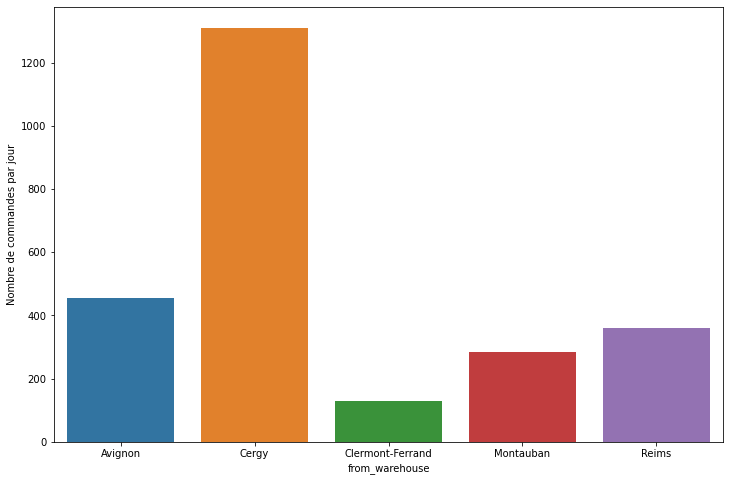

In [81]:
plt.figure(figsize=(12,8))
sns.barplot(x="from_warehouse", y="order_total_volume", data=pressure)
plt.ylabel("Nombre de commandes par jour")
plt.show()

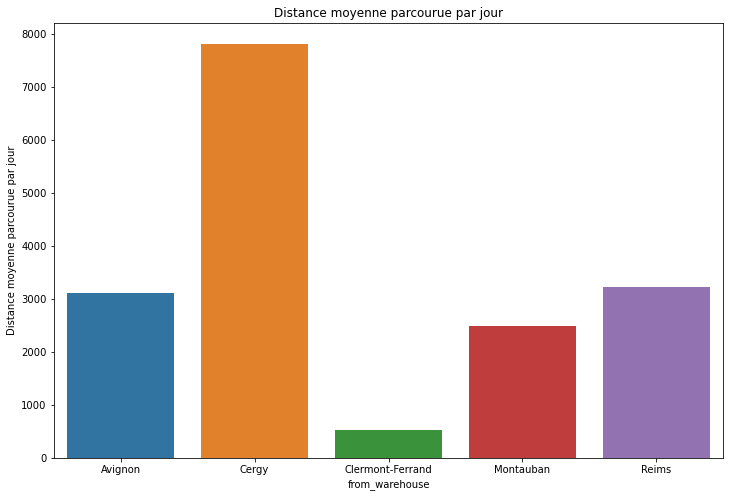

In [83]:
plt.figure(figsize=(12,8))
sns.barplot(x="from_warehouse", y="total_distance", data=pressure)
plt.ylabel("Distance moyenne parcourue par jour")
plt.title("Distance moyenne parcourue par jour")
plt.show()

In [ ]:
df = routes.copy()
df["route_date"] = pd.to_datetime(df["route_date"])
df = df[["n_routes", "route_date", "from_warehouse"]].groupby(["route_date", "from_warehouse"]).agg(sum).reset_index()

Text(0.5, 1.0, 'Nombre de trajets par jour par entrepôt')

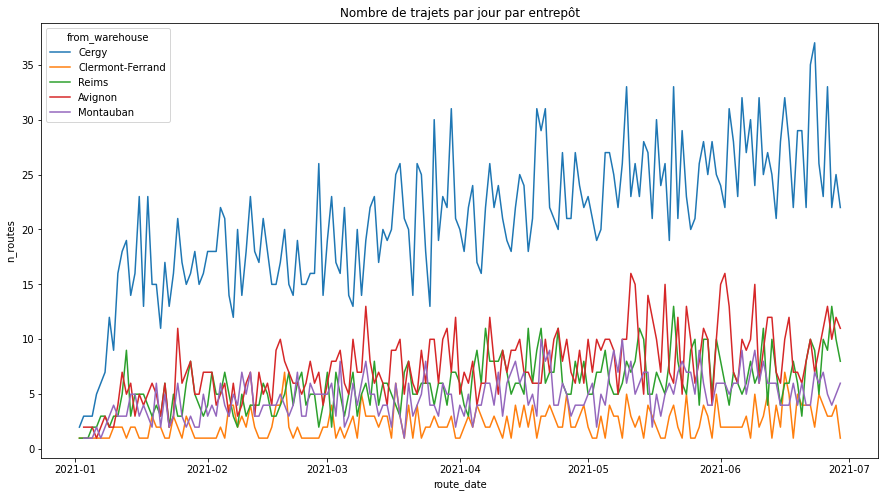

In [60]:
plt.figure(figsize=(15,8))
sns.lineplot(x="route_date", y="n_routes", hue="from_warehouse", data=df)
plt.title("Nombre de trajets par jour par entrepôt")